In [282]:
import numpy as np

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [283]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

In [284]:
y = y.reshape((-1, 1))

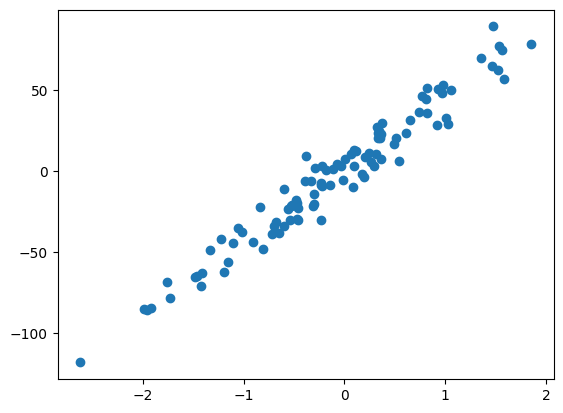

In [285]:
plt.scatter(X, y)
plt.show()

In [286]:
def init_params(n_in, n_out):
    W = np.random.rand(n_in, n_out) * 0.01
    b = np.zeros((n_out, 1))

    return W, b

In [287]:
def model(X, W, b):
    return X @ W + b

In [288]:
def activation(Z):
    return Z

In [289]:
def predict(X, W, b):
    return np.where(model(X, W, b) >= 0, 1, 0)

In [290]:
def perceptron(X, y, lr, epochs):
    n_in, n_out = X.shape[1], y.shape[1]
    W, b = init_params(n_in, n_out)
    errors = []

    for i in range(epochs):
        out = model(X, W, b)
        Z = activation(out)

        diff = (y - Z)
        W += (lr * (X.T @ diff) / X.shape[0])
        b += lr * diff.mean(axis=0).reshape(b.shape)

        mse = (diff ** 2).mean()
        errors.append(mse)
        
    return W, b, errors

In [291]:
W, b, errors = perceptron(X, y, 0.1, 100)

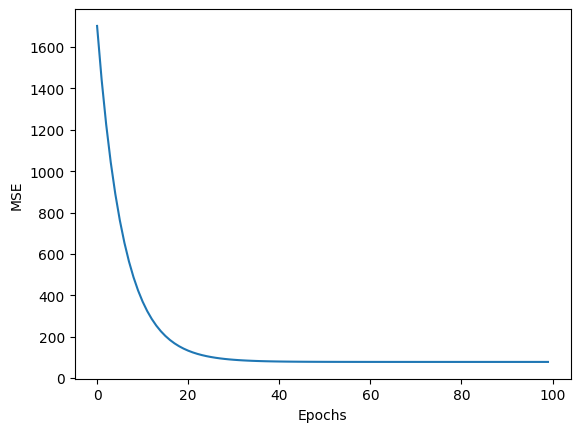

In [292]:
plt.plot(errors)
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()

In [293]:
x_plot = np.linspace(X.min(), X.max(), 100)
y_line = W[0] * x_plot + b[0]

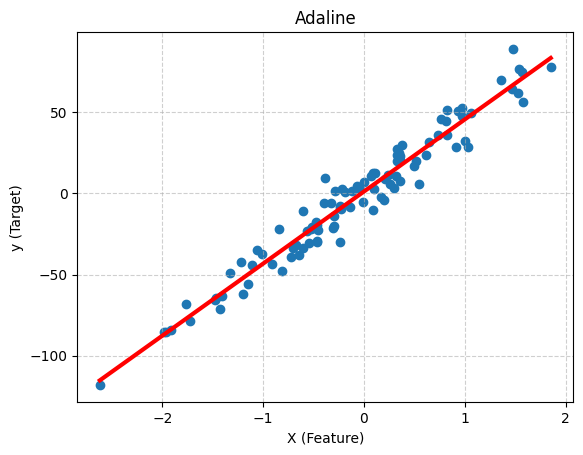

In [294]:
plt.plot(x_plot, y_line, color='red', linewidth=3, label='Linha de Regressão Adaline')
plt.scatter(X, y)

plt.title('Adaline')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()